**Задание 1.** Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
hr_df = pd.read_csv('/content/HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задание 2.** Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение

In [4]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_df.median()

<ipython-input-5-0ec9943ed004>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
hr_df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3**. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

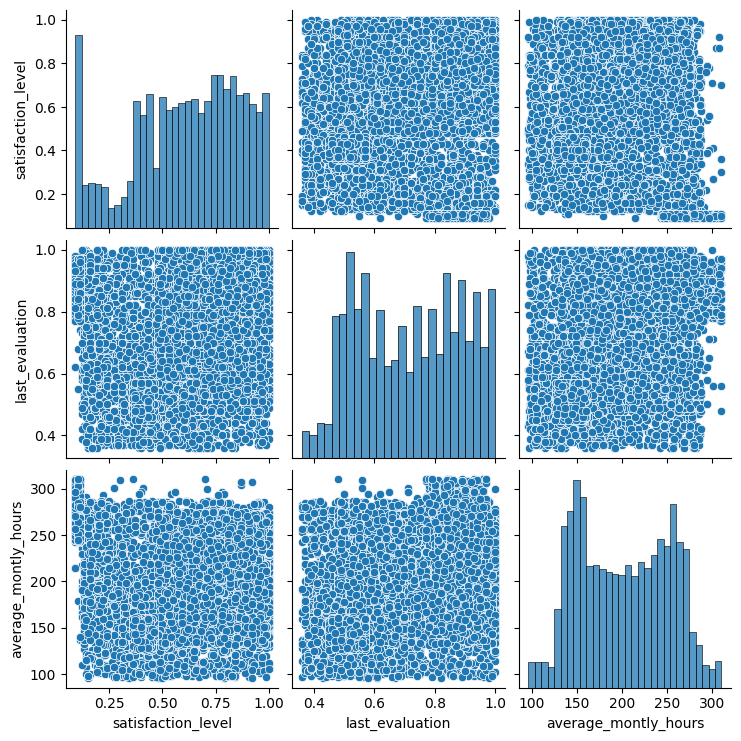

In [3]:
#сделаем визуализацию корреляций, но только для количественных переменных - уберем как категориальные,
# так и те, котореы закодированы 0 или 1, а также порядковые (например такие как число проектов,
#для них график будет не показателен)
sns.pairplot(hr_df[['satisfaction_level', 'last_evaluation', 'average_montly_hours']])

Судя по графикам выраженной корреляции нигде не прослеживается, однако проверим это дополнительно с помощью корреляционных коэффициентов. В проверку добавим также порядковые переменные и будет использовать коэффициет корреляции Спирмана (так как используем в том числе порядковые переменные)

In [11]:
hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company']].corr(method = 'spearman')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


Визуализируем коэффициенты корреляции с помощью тепловой карты

<Axes: >

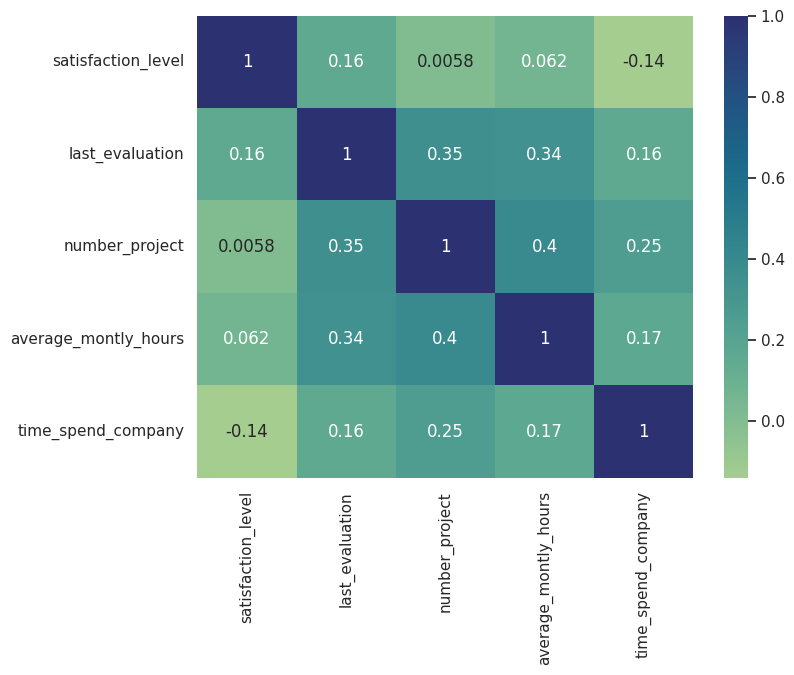

In [13]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                   'time_spend_company']].corr(method='spearman'), annot=True, cmap='crest')

Можно сделать вывод, что в наибольшей степени скоррелированы (коэффициент корреляции Спирмана 0,4) число проектов (number_project) и время проведенное на работе (avarage_mountly_hours), что в целом логично. Наименее скоррелированы число проектов и satisfaction_level (коэффициент корреляции Спирмана близок к нулю).

**Задание 4.** Рассчитайте сколько сотрудников работает в каждом
департаменте

Рассчитаем двум способами

In [22]:
hr_df.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [25]:
hr_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**Задание 5.** Показать распределение сотрудников по зарплатам

Тоже сделаем несколькими способами

In [23]:
hr_df.groupby('salary').count()['satisfaction_level']

salary
high      1237
low       7316
medium    6446
Name: satisfaction_level, dtype: int64

In [24]:
hr_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: >

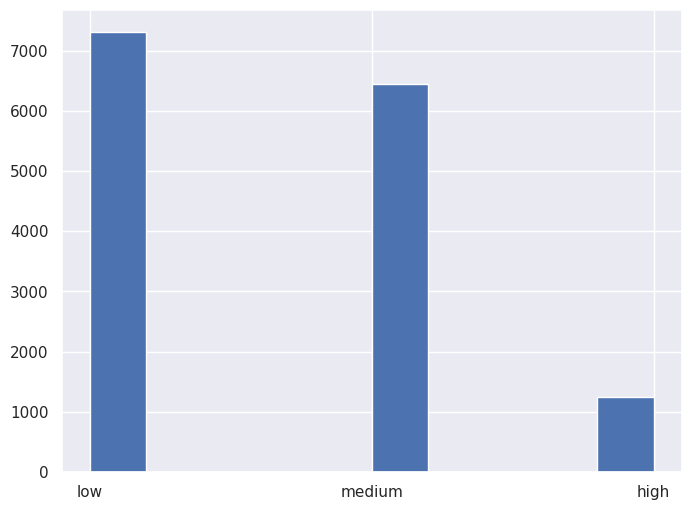

In [26]:
hr_df['salary'].hist()

**Задание 6.** Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [28]:
hr_df.pivot_table(index='department', columns='salary', values='satisfaction_level', aggfunc='count')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


**Задание 7.** Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [30]:
Hr_low_salary = hr_df[hr_df['salary'] == 'low']
Hr_high_salary = hr_df[hr_df['salary'] == 'high']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


<Axes: >

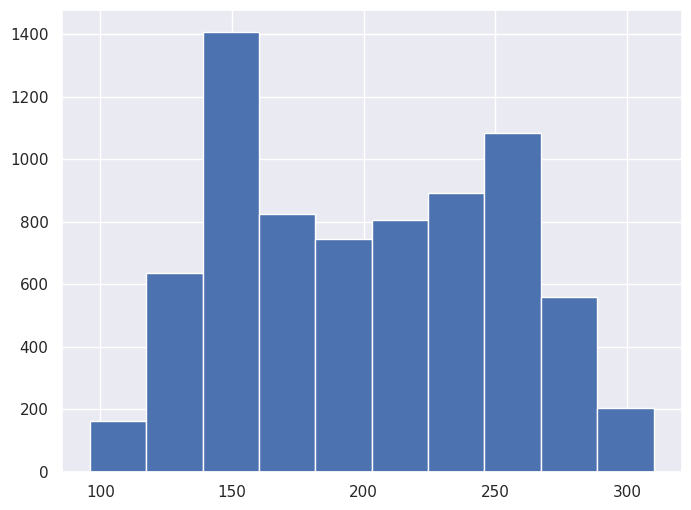

In [31]:
Hr_low_salary['average_montly_hours'].hist()


In [36]:
Hr_low_salary['average_montly_hours'].var()

2583.914000624853

<Axes: >

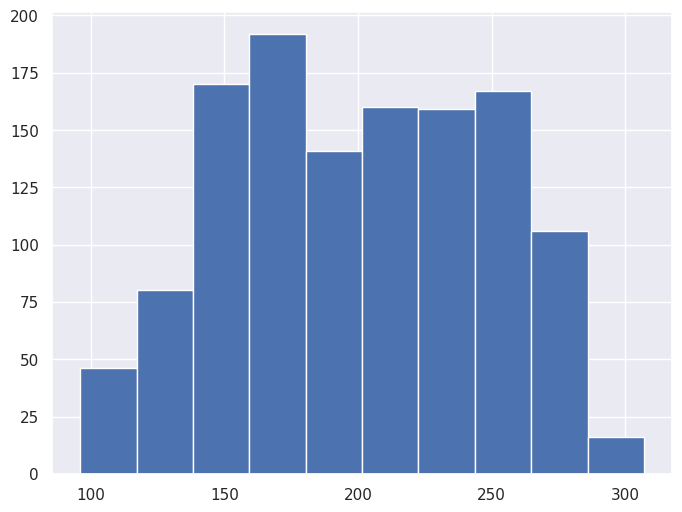

In [32]:
Hr_high_salary['average_montly_hours'].hist()

In [37]:
Hr_high_salary['average_montly_hours'].var()

2276.2866157553112

In [39]:
stat, p = stats.ttest_ind(Hr_low_salary['average_montly_hours'], Hr_high_salary['average_montly_hours'])
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

Не отклоняем нулевую гипотезу


In [38]:
stat, p = stats.ttest_ind(Hr_low_salary['average_montly_hours'], Hr_high_salary['average_montly_hours'], equal_var=False)
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

Не отклоняем нулевую гипотезу


In [40]:
stat, p = stats.mannwhitneyu(Hr_low_salary['average_montly_hours'], Hr_high_salary['average_montly_hours'])
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

Не отклоняем нулевую гипотезу


**Задание 8.** Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

Найдем долю сотрудников в повышение за последние 5 лет

In [35]:
promotion_left_df = pd.DataFrame(hr_df.groupby('left').count()['promotion_last_5years'])
promotion_left_df


,promotion_last_5years
left,
0,11428
1,3571


In [24]:
n = len(hr_df['promotion_last_5years'])
n

14999

In [36]:
promotion_left_df['proportion_promotion'] = promotion_left_df['promotion_last_5years'] / n
promotion_left_df

,promotion_last_5years,proportion_promotion
left,,
0,11428,0.761917
1,3571,0.238083


Можно сделать вывод, что срели уволившихся сотрудников было гораздо больше тех, кто не получал повышение за последние 5 лет, можно выдвинуть гипотезу, что это могло быть одной из причин увольнения

Теперь найдем среднюю степень удовлетворенности

In [38]:
satisfaction_left_df = pd.DataFrame(hr_df.groupby('left').mean()['satisfaction_level'])
satisfaction_left_df

<ipython-input-38-853b874474e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  satisfaction_left_df = pd.DataFrame(hr_df.groupby('left').mean()['satisfaction_level'])


,satisfaction_level
left,
0,0.666810
1,0.440098


Можно выдвинуть гипотезу, что средний уровень удовлетворенности среди сотрудников, которые уволились, был меньше, чем у сотрудников, которые не уволились. Можно проверить эту гипотезу с помощью теста. Но сначала проверим нормальность распределения данных, чтобы понять какой тест использовать.

<Axes: >

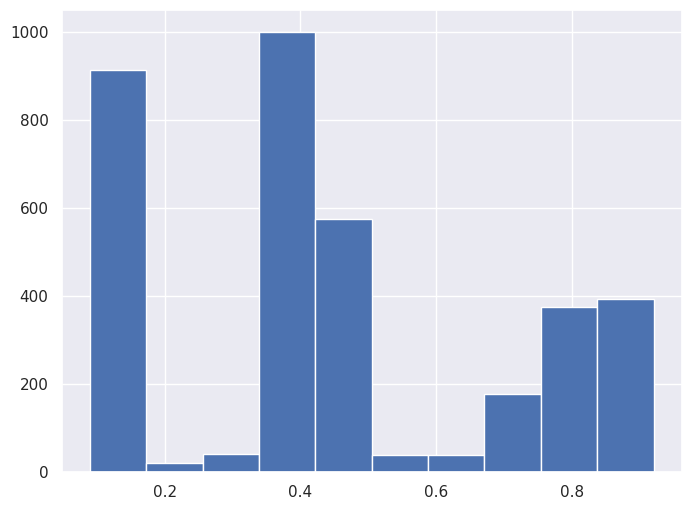

In [45]:
hr_left_df['satisfaction_level'].hist()

<Axes: >

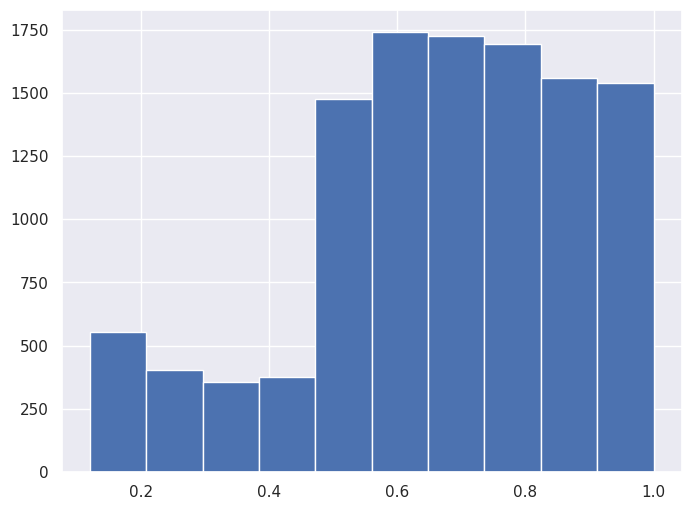

In [46]:
hr_noleft_df['satisfaction_level'].hist()

Похоже, что данные распредлены ненормально, поэтому применим тест Манн-Уитни

In [47]:
hr_left_df = hr_df[hr_df['left'] == 1]
hr_noleft_df = hr_df[hr_df['left'] == 0]
stat, p = stats.mannwhitneyu(hr_left_df['satisfaction_level'], hr_noleft_df['satisfaction_level'])
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

Отклоняем нулевую гипотезу


Делаем вывод, что степень удовлетворенности у тех, кто уволился, и у тех, кто не уволился, статистичеси значимо различаются

Теперь найдем среднее количество проектов

In [40]:
project_left_df = pd.DataFrame(hr_df.groupby('left').mean()['number_project'])
project_left_df


<ipython-input-40-2a3fff121e9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  project_left_df = pd.DataFrame(hr_df.groupby('left').mean()['number_project'])


,number_project
left,
0,3.786664
1,3.855503


Среднее число проектов у уволившихся сотрудников больше, но незначительно, поэтому стоит проверить с помощью теста. Проверим распределение данных.

<Axes: >

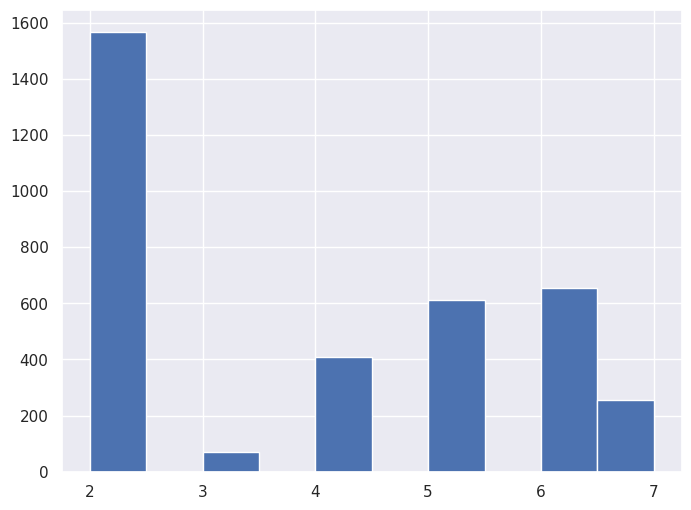

In [49]:
hr_left_df['number_project'].hist()

<Axes: >

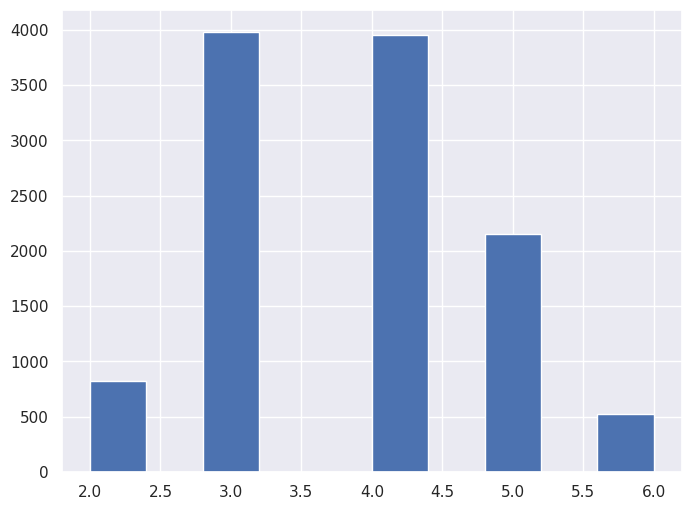

In [50]:
hr_noleft_df['number_project'].hist()

Как минимум для тех, кто уволился, данные распределены ненормально, поэтому применим тест Манн-Уитни.

In [53]:
stat, p = stats.mannwhitneyu(hr_left_df['number_project'], hr_noleft_df['number_project'])
print(p)
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

0.016691756612109285
Отклоняем нулевую гипотезу


Tест показал, что все-таки чиcло проектов у тех, кто уволился, статистически значимо больше (хотя и незначительно). Хотя, напрмиер, по боксплотам (см. ниже) это не очевидно.

Text(0.5, 1.0, 'Количество проектов у уволившихся и оставшихся сотрудников')

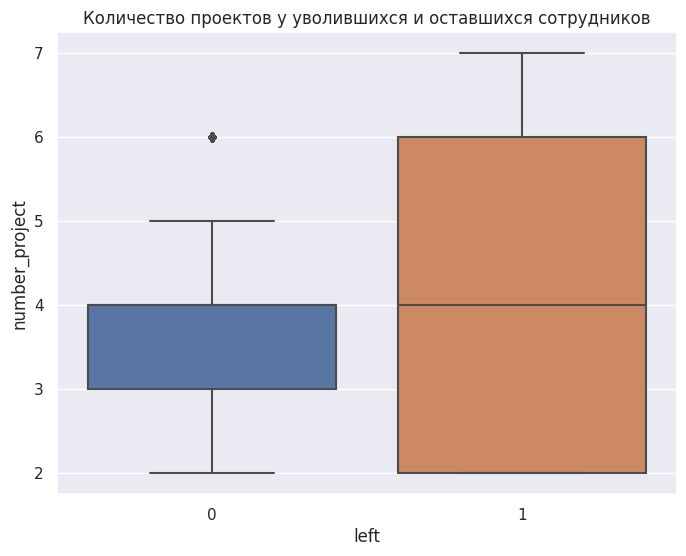

In [43]:
sns.boxplot(x='left', y='number_project', data=hr_df)
plt.title('Количество проектов у уволившихся и оставшихся сотрудников')

В целом можно сделать вывод, что у уволившихся сотруников значительно меньше уровень удовлетворенности немного больше количество проектов и меньше доля тех, кто получал повышение в последние 5 лет. Возможно, что все это повлияло на их решение уволиться, и HR отделу стоит обратить внимание на эти факторы

**Задание 9.** Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_LDA = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years']]
hr_LDA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_LDA, hr_df['left'], random_state=42)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

**Задание 10.** Загрузить jupyter notebook с решением на github и прислать ссылку